the value of h is 0.009425720532822661


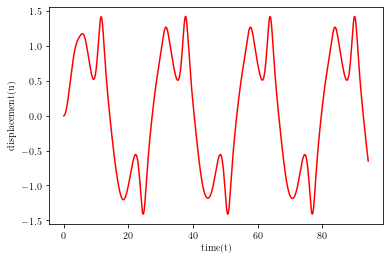

The value of GAMMA = 0.35


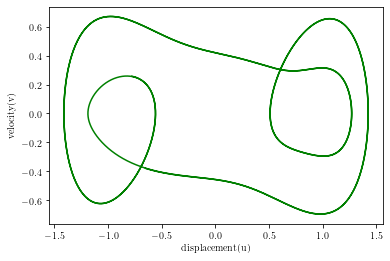

SAMPLING


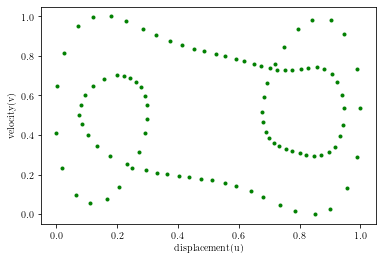

In [33]:
### duffing oscillator

import matplotlib
import numpy as np
from numpy import zeros, linspace, pi, cos, array
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
from matplotlib.patches import PathPatch

t0=0
tf=30*pi
omega=1.2                     
beta=1              
delta=0.3             
gamma=0.35          
alpha=1              
n=10000                                    #iteration

sampsize=100                               #SampleSize
sampstart=5000                             #SampleStart
sampend=n                                  #SampleEnd

h=(tf-t0)/(n-1)                            #stepsize
print('the value of h is',h)
u0=0                                       #initial displacement


t=linspace(t0,tf,n)
v=zeros([n])
u=zeros([n])
u[0]=u0
v[0]=0                                     #initial velocity

##### DEFINING FUNCTIONS

def dudt(t,u,v):                                                #### u' = v                                              
    return(v)

def funt(t,u,v):                                                #### v' = -delta*v+alpha*u-beta*u**3+gamma*cos(omega*t)   
    return (-delta*v+alpha*u-beta*u**3+gamma*cos(omega*t))

######  RK4 ALGORITHM USING FOR LOOP
 
for i in range(1,n):
    k1=h*dudt(t[i-1],u[i-1],v[i-1])
    l1=h*funt(t[i-1],u[i-1],v[i-1])
    
    k2=h*dudt(t[i-1]+(0.5*h),u[i-1]+(k1*0.5),v[i-1]+(l1*0.5))
    l2=h*funt(t[i-1]+(0.5*h),u[i-1]+(k1*0.5),v[i-1]+(l1*0.5))
    
    k3=h*dudt(t[i-1]+(0.5*h),u[i-1]+(k2*0.5),v[i-1]+(l2*0.5))
    l3=h*funt(t[i-1]+(0.5*h),u[i-1]+(k2*0.5),v[i-1]+(l2*0.5))
    
    k4=h*dudt(t[i-1]+h,u[i-1]+(k3),v[i-1]+(l3))
    l4=h*funt(t[i-1]+h,u[i-1]+(k3),v[i-1]+(l3))
    
    u[i]=u[i-1]+(1/6)*(k1+(2*k2)+(2*k3)+k4)
    v[i]=v[i-1]+(1/6)*(l1+(2*l2)+(2*l3)+l4)

### PLOT

plt.plot(t,u,'-r')
plt.xlabel('time(t)')
plt.ylabel('displacement(u)')
plt.show()
print('The value of GAMMA =',gamma)
fig = plt.figure()
plt.plot(u[sampstart:sampend],v[sampstart:sampend],'-g')
plt.xlabel('displacement(u)')
plt.ylabel('velocity(v)')
plt.show()

#### InterPlay

import pandas as pd 
xx = lambda a: np.interp(a, (a.min(), a.max()), (0, +1))
uu = xx(u[sampstart:sampend:int(sampsize/2)])
vv = xx(v[sampstart:sampend:int(sampsize/2)])
huh = np.array(list(zip(uu,vv)))

huh = huh[np.random.choice(huh.shape[0], sampsize, replace=False), :]
u1,v1 = zip(*huh)

#print(huh)
pd.DataFrame(huh).to_csv("data/seed1_data.csv", header=['X_value','Y_value'], index=True, index_label='point_id')

#### SAMPLING

print("SAMPLING")


fig = plt.figure()
plt.plot(u1,v1,'.g')
plt.xlabel('displacement(u)')
plt.ylabel('velocity(v)')
plt.show()

Rips complex is of dimension 2 - 166750 simplices - 100 vertices
Entropy for Dim 1 is [1.58632277]


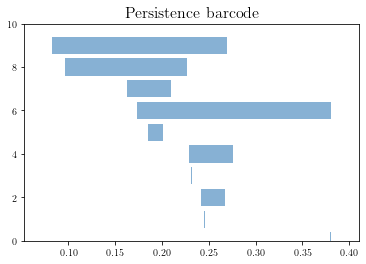

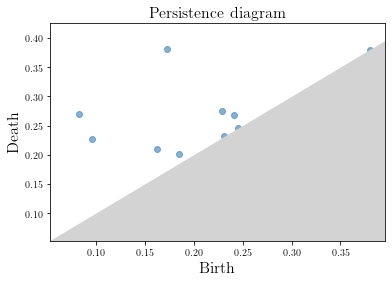

In [14]:
my_data = huh
from gudhi import *
import gudhi

rips_complex = gudhi.RipsComplex(points=my_data)

simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices'
print(result_str)

BarCodes_RipsAll = simplex_tree.persistence()
BarCodes_Rips1 = list(filter(lambda BettiNum: BettiNum[0] == 1, BarCodes_RipsAll))

gudhi.plot_persistence_barcode(BarCodes_Rips1)
gudhi.plot_persistence_diagram(BarCodes_Rips1)

entropy = representations.Entropy(normalized=True)
print("Entropy for Dim 1 is {}".format(entropy(np.array([j for i, j in BarCodes_Rips1]))))

max_filtration_value = np.array(list(st.get_filtration()))[-1, 1]

In [40]:
pointss = [[1, 1], [7, 0], [4, 6], [9, 6], [0, 14], [2, 19], [9, 17]]
#for i in (gudhi.RipsComplex(points=pointss).create_simplex_tree().get_skeleton(2)):
#    print(i[0])
simplex_tree = gudhi.RipsComplex(points=pointss, max_edge_length=6.0).create_simplex_tree()
#print(simplex_tree.persistence())
#list(simplex_tree.get_simplices())

In [42]:
def genDiagWithFilt(points, length):
    rc = gudhi.RipsComplex(points=points, max_edge_length=length)
    st = rc.create_simplex_tree(max_dimension=2)

    BarCodes_RipsAll = st.persistence()
    BarCodes_Rips1 = list(
        filter(lambda BettiNum: BettiNum[0] == 1, BarCodes_RipsAll))
    max_filtration_value = np.array(list(st.get_filtration()))[-1, 1]

    # We are only going to plot the triangles
    triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0]) == 3])
    return max_filtration_value, triangles, BarCodes_Rips1

from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

@interact
def blah(length=(max_filtration_value/10,max_filtration_value,max_filtration_value/10)):
    max_filtration_value, triangles, BarCodes_Rips1 = genDiagWithFilt(huh, length=length)
    fig2, ax2 = plt.subplots()
    ax2.set_aspect('equal')
    ax2.triplot(u1, v1, triangles, 'go-', lw=1.0,
                alpha=0.5)
    ax2.set_title('triplot of user-specified triangulation, filtration: {}'.format(max_filtration_value))
    ax2.set_xlabel('Longitude (degrees)')
    ax2.set_ylabel('Latitude (degrees)')

    plt.show()
    gudhi.plot_persistence_barcode(BarCodes_Rips1)

interactive(children=(FloatSlider(value=0.0499969408667125, description='length', max=0.099993881733425, min=0…

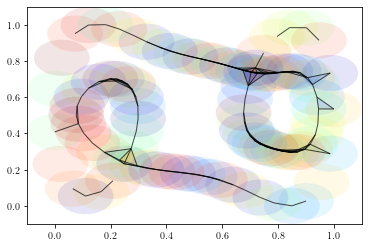

In [39]:
fig2, ax2 = plt.subplots()
patches = []

hey = [i[0] for i in st.get_skeleton(2)]
kalel = [huh[j] for j in hey]

for x1, y1 in huh:
    circle = Circle((x1, y1), max_filtration_value, alpha=0.1)
    patches.append(circle)

for kkk in kalel:
    if len(kkk) == 2:
        path_data = [(Path.MOVETO, kkk[0]), (Path.LINETO, kkk[1]),]
        codes, verts = zip(*path_data)
        path = Path(verts, codes)
        patch = PathPatch(path, edgecolor='black', alpha=0.7)
        ax2.add_patch(patch)
    if len(kkk) > 2:
        polygon = Polygon(kkk, edgecolor='black', alpha=0.7)
        patches.append(polygon)

p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.1)

colors = 100*np.random.rand(len(patches))
p.set_array(np.array(colors))
plt.ylim((-0.1, 1.1))
plt.xlim((-0.1, 1.1))
ax2.add_collection(p)
#plt.plot(u1,v1,'.g')

plt.show()

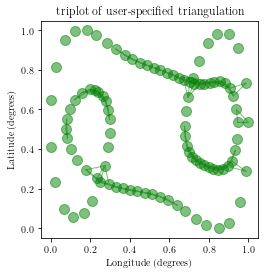

Max Filtration is 0.099993881733425


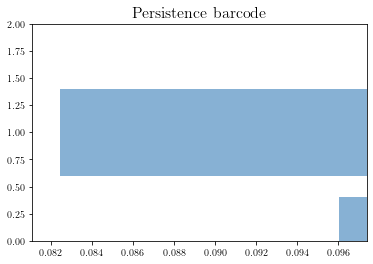

In [37]:
import numpy as np
import gudhi
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

points = huh
rc = gudhi.RipsComplex(points=points, max_edge_length=0.1)
st = rc.create_simplex_tree(max_dimension=2)

BarCodes_RipsAll = st.persistence()
BarCodes_Rips1 = list(filter(lambda BettiNum: BettiNum[0] == 1, BarCodes_RipsAll))

max_filtration_value = np.array(list(st.get_filtration()))[-1,1]

# We are only going to plot the triangles
triangles = np.array([s[0] for s in st.get_skeleton(2) if len(s[0])==3])

fig21, ax21 = plt.subplots()
ax21.set_aspect('equal')
ax21.triplot(u1, v1, triangles, 'go-', lw=1.0, alpha=0.5, ms=max_filtration_value*100)
ax21.set_title('triplot of user-specified triangulation')
ax21.set_xlabel('Longitude (degrees)')
ax21.set_ylabel('Latitude (degrees)')

plt.show()

print("Max Filtration is {}".format(max_filtration_value))
gudhi.plot_persistence_barcode(BarCodes_Rips1)